In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures

In [2]:
data=pd.read_csv(r"C:\Users\Saikiran\Downloads\Sample_for_AI (1) (1) (1) (1) (1) (1) (2) (1) (1) (4).csv")

In [3]:
data

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,1,No,No,No,0.0,0,0.00,NaN,API
1,2,No,No,No,5.0,674,2.50,NaN,API
2,3,Yes,No,No,2.0,1532,2.00,Business Administration,Landing Page Submission
3,4,No,No,No,1.0,305,1.00,Media and Advertising,Landing Page Submission
4,5,Yes,No,No,2.0,1428,1.00,NaN,Landing Page Submission
...,...,...,...,...,...,...,...,...,...
9235,9236,Yes,Yes,No,8.0,1845,2.67,IT Projects Management,Landing Page Submission
9236,9237,No,No,No,2.0,238,2.00,Media and Advertising,Landing Page Submission
9237,9238,No,Yes,No,2.0,199,2.00,Business Administration,Landing Page Submission
9238,9239,Yes,No,No,3.0,499,3.00,Human Resource Management,Landing Page Submission


In [4]:
data.head()

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
0,1,No,No,No,0.0,0,0.0,NaN,API
1,2,No,No,No,5.0,674,2.5,NaN,API
2,3,Yes,No,No,2.0,1532,2.0,Business Administration,Landing Page Submission
3,4,No,No,No,1.0,305,1.0,Media and Advertising,Landing Page Submission
4,5,Yes,No,No,2.0,1428,1.0,NaN,Landing Page Submission


In [5]:
data.shape

(9240, 9)

In [6]:
data.columns

Index(['ID', 'Purchased', 'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Specialization',
       'Origin'],
      dtype='object')

In [7]:
data.dtypes

ID                               int64
Purchased                       object
Do Not Email                    object
Do Not Call                     object
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
Specialization                  object
Origin                          object
dtype: object

In [8]:
data.describe()

,ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,4620.500000,3.445238,487.698268,2.362820
std,2667.502577,4.854853,548.021466,2.161418
min,1.000000,0.000000,0.000000,0.000000
25%,2310.750000,1.000000,12.000000,1.000000
50%,4620.500000,3.000000,248.000000,2.000000
75%,6930.250000,5.000000,936.000000,3.000000
max,9240.000000,251.000000,2272.000000,55.000000


In [9]:
from skimpy import skim
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 9240   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 9      │ │ int32       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA    ┃ NA %   ┃ mean  ┃ sd    ┃ p0  ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ ID                        │     0 │      0 │  4600 │  2700 │   1 │  2300 │  4600 │  6900 │  9200 │ ▇▇▇▇▇▇  │  │
│ │ TotalVisits               │   137 │   1.48 │   3.4 │   4.9 │   0 │     1 │     3 │     5 │   250 │    ▇    │  │
│ │ Total Time Spent on       │     0 │      0 │   490 │   550 │   0 │    12 │   250 │   940 │  2300 │  ▇▁▁▂▁  │  │
│ │ Website                   │       │        │       │       │     │       │       │       │       │         │  │
│ │ Page Views Per Visit      │   137 │   1.48 │   2.4 │   2.2 │   0 │     1 │     2 │     3 │    55 │    ▇    │  │
│ └───────────────────────────┴───────┴────────┴───────┴───────┴─────┴───────┴───────┴───────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA        ┃ NA %        ┃ words per row             ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Purchased                    │         0 │           0 │                         1 │                  9240 │  │
│ │ Do Not Email                 │         0 │           0 │                         1 │                  9240 │  │
│ │ Do Not Call                  │         0 │           0 │                         1 │                  9240 │  │
│ │ Specialization               │      3380 │       36.58 │                       1.5 │                 14269 │  │
│ │ Origin                       │         0 │           0 │                       2.2 │                 20505 │  │
│ └──────────────────────────────┴───────────┴─────────────┴───────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [11]:
missing_values = data.isnull().sum()
missing_values

ID                                0
Purchased                         0
Do Not Email                      0
Do Not Call                       0
TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Specialization                 3380
Origin                            0
dtype: int64

In [12]:
columns_list = data.columns.tolist()
columns_list


['ID',
 'Purchased',
 'Do Not Email',
 'Do Not Call',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Specialization',
 'Origin']

In [13]:
data.dtypes

ID                               int64
Purchased                       object
Do Not Email                    object
Do Not Call                     object
TotalVisits                    float64
Total Time Spent on Website      int64
Page Views Per Visit           float64
Specialization                  object
Origin                          object
dtype: object

In [14]:
data_cleaned = data.dropna()

In [15]:
data_cleaned

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
2,3,Yes,No,No,2.0,1532,2.00,Business Administration,Landing Page Submission
3,4,No,No,No,1.0,305,1.00,Media and Advertising,Landing Page Submission
6,7,Yes,No,No,2.0,1640,2.00,Supply Chain Management,Landing Page Submission
8,9,No,No,No,2.0,71,2.00,IT Projects Management,Landing Page Submission
9,10,No,No,No,4.0,58,4.00,Finance Management,API
...,...,...,...,...,...,...,...,...,...
9235,9236,Yes,Yes,No,8.0,1845,2.67,IT Projects Management,Landing Page Submission
9236,9237,No,No,No,2.0,238,2.00,Media and Advertising,Landing Page Submission
9237,9238,No,Yes,No,2.0,199,2.00,Business Administration,Landing Page Submission
9238,9239,Yes,No,No,3.0,499,3.00,Human Resource Management,Landing Page Submission


In [16]:
duplicates = data_cleaned.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [17]:
print(data_cleaned['Purchased'].unique())
print(data_cleaned['Do Not Email'].unique())
print(data_cleaned['Do Not Call'].unique())
print(data_cleaned['Specialization'].unique())
print(data_cleaned['Origin'].unique())

['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['Business Administration' 'Media and Advertising'
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']
['Landing Page Submission' 'API' 'Lead Add Form' 'Lead Import']


In [18]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
data_cleaned = remove_outliers(data_cleaned, 'TotalVisits')
data_cleaned = remove_outliers(data_cleaned, 'Total Time Spent on Website')
data_cleaned = remove_outliers(data_cleaned, 'Page Views Per Visit')


In [19]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5295 entries, 2 to 9239
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           5295 non-null   int64  
 1   Purchased                    5295 non-null   object 
 2   Do Not Email                 5295 non-null   object 
 3   Do Not Call                  5295 non-null   object 
 4   TotalVisits                  5295 non-null   float64
 5   Total Time Spent on Website  5295 non-null   int64  
 6   Page Views Per Visit         5295 non-null   float64
 7   Specialization               5295 non-null   object 
 8   Origin                       5295 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 413.7+ KB


In [20]:
data_cleaned.describe()

,ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,5295.000000,5295.000000,5295.000000,5295.000000
mean,4724.316903,3.498206,591.053069,2.750398
std,2628.386566,2.080625,552.831760,1.589291
min,3.000000,0.000000,0.000000,0.000000
25%,2490.500000,2.000000,125.000000,2.000000
50%,4773.000000,3.000000,355.000000,2.500000
75%,6973.500000,5.000000,1069.500000,4.000000
max,9240.000000,9.000000,2272.000000,7.000000


In [21]:
data_cleaned.head()

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
2,3,Yes,No,No,2.0,1532,2.0,Business Administration,Landing Page Submission
3,4,No,No,No,1.0,305,1.0,Media and Advertising,Landing Page Submission
6,7,Yes,No,No,2.0,1640,2.0,Supply Chain Management,Landing Page Submission
8,9,No,No,No,2.0,71,2.0,IT Projects Management,Landing Page Submission
9,10,No,No,No,4.0,58,4.0,Finance Management,API


In [22]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler = StandardScaler()
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

In [23]:
data_cleaned

,ID,Purchased,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Origin
2,3,Yes,No,No,-0.720143,1.702210,-0.472204,Business Administration,Landing Page Submission
3,4,No,No,No,-1.200813,-0.517481,-1.101475,Media and Advertising,Landing Page Submission
6,7,Yes,No,No,-0.720143,1.897586,-0.472204,Supply Chain Management,Landing Page Submission
8,9,No,No,No,-0.720143,-0.940796,-0.472204,IT Projects Management,Landing Page Submission
9,10,No,No,No,0.241197,-0.964314,0.786338,Finance Management,API
...,...,...,...,...,...,...,...,...,...
9235,9236,Yes,Yes,No,2.163878,2.268439,-0.050592,IT Projects Management,Landing Page Submission
9236,9237,No,No,No,-0.720143,-0.638687,-0.472204,Media and Advertising,Landing Page Submission
9237,9238,No,Yes,No,-0.720143,-0.709239,-0.472204,Business Administration,Landing Page Submission
9238,9239,Yes,No,No,-0.239473,-0.166528,0.157067,Human Resource Management,Landing Page Submission


In [24]:
categorical_columns = ['Purchased', 'Do Not Email', 'Do Not Call', 'Specialization', 'Origin']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical_data = encoder.fit_transform(data_cleaned[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_columns))
encoded_categorical_df.reset_index(drop=True, inplace=True)
data_cleaned.reset_index(drop=True, inplace=True)
data_transformed = pd.concat([data_cleaned.drop(categorical_columns, axis=1), encoded_categorical_df], axis=1)

In [25]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5295 entries, 0 to 5294
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   ID                                        5295 non-null   int64  
 1   TotalVisits                               5295 non-null   float64
 2   Total Time Spent on Website               5295 non-null   float64
 3   Page Views Per Visit                      5295 non-null   float64
 4   Purchased_Yes                             5295 non-null   float64
 5   Do Not Email_Yes                          5295 non-null   float64
 6   Do Not Call_Yes                           5295 non-null   float64
 7   Specialization_Business Administration    5295 non-null   float64
 8   Specialization_E-Business                 5295 non-null   float64
 9   Specialization_E-COMMERCE                 5295 non-null   float64
 10  Specialization_Finance Management   

In [26]:
data_transformed.describe()

,ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Purchased_Yes,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import
count,5295.000000,5.295000e+03,5.295000e+03,5.295000e+03,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,...,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000
mean,4724.316903,-5.367651e-18,-1.744486e-17,4.830885e-17,0.434939,0.085930,0.000378,0.068555,0.009821,0.018508,...,0.033994,0.088008,0.016808,0.011898,0.006421,0.058924,0.031539,0.816808,0.067233,0.002455
std,2628.386566,1.000094e+00,1.000094e+00,1.000094e+00,0.495796,0.280287,0.019433,0.252720,0.098620,0.134792,...,0.181232,0.283333,0.128565,0.108437,0.079882,0.235504,0.174786,0.386860,0.250449,0.049493
min,3.000000,-1.681483e+00,-1.069238e+00,-1.730745e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2490.500000,-7.201428e-01,-8.431084e-01,-4.722038e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4773.000000,-2.394727e-01,-4.270293e-01,-1.575684e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6973.500000,7.218676e-01,8.655294e-01,7.863377e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9240.000000,2.644548e+00,3.040899e+00,2.674150e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
data_transformed.head()

,ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Purchased_Yes,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import
0,3,-0.720143,1.702210,-0.472204,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4,-1.200813,-0.517481,-1.101475,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7,-0.720143,1.897586,-0.472204,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,9,-0.720143,-0.940796,-0.472204,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10,0.241197,-0.964314,0.786338,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
data_transformed['Interaction_TotalVisits_PageViews'] = data_transformed['TotalVisits'] * data_transformed['Page Views Per Visit']

In [29]:
data_transformed['Total_Engagement'] = data_transformed['TotalVisits'] + data_transformed['Page Views Per Visit']

In [30]:
from sklearn.preprocessing import PolynomialFeatures
numerical_columns = ['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data_transformed[numerical_columns])
poly_feature_names = poly.get_feature_names_out(numerical_columns)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
data_transformed = pd.concat([data_transformed, poly_df], axis=1)

In [31]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5295 entries, 0 to 5294
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ID                                                5295 non-null   int64  
 1   TotalVisits                                       5295 non-null   float64
 2   Total Time Spent on Website                       5295 non-null   float64
 3   Page Views Per Visit                              5295 non-null   float64
 4   Purchased_Yes                                     5295 non-null   float64
 5   Do Not Email_Yes                                  5295 non-null   float64
 6   Do Not Call_Yes                                   5295 non-null   float64
 7   Specialization_Business Administration            5295 non-null   float64
 8   Specialization_E-Business                         5295 non-null   float64
 9   Specialization_E-CO

In [32]:
data_transformed.head()

,ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Purchased_Yes,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Total_Engagement,TotalVisits,Page Views Per Visit,Total Time Spent on Website,TotalVisits^2,TotalVisits Page Views Per Visit,TotalVisits Total Time Spent on Website,Page Views Per Visit^2,Page Views Per Visit Total Time Spent on Website,Total Time Spent on Website^2
0,3,-0.720143,1.702210,-0.472204,1.0,0.0,0.0,1.0,0.0,0.0,...,-1.192347,-0.720143,-0.472204,1.702210,0.518606,0.340054,-1.225834,0.222976,-0.803790,2.897519
1,4,-1.200813,-0.517481,-1.101475,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.302288,-1.200813,-1.101475,-0.517481,1.441952,1.322665,0.621398,1.213246,0.569992,0.267787
2,7,-0.720143,1.897586,-0.472204,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.192347,-0.720143,-0.472204,1.897586,0.518606,0.340054,-1.366533,0.222976,-0.896048,3.600834
3,9,-0.720143,-0.940796,-0.472204,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.192347,-0.720143,-0.472204,-0.940796,0.518606,0.340054,0.677508,0.222976,0.444248,0.885098
4,10,0.241197,-0.964314,0.786338,0.0,0.0,0.0,0.0,0.0,0.0,...,1.027535,0.241197,0.786338,-0.964314,0.058176,0.189663,-0.232590,0.618327,-0.758276,0.929902


In [33]:
data_transformed.describe()

,ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Purchased_Yes,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Total_Engagement,TotalVisits,Page Views Per Visit,Total Time Spent on Website,TotalVisits^2,TotalVisits Page Views Per Visit,TotalVisits Total Time Spent on Website,Page Views Per Visit^2,Page Views Per Visit Total Time Spent on Website,Total Time Spent on Website^2
count,5295.000000,5.295000e+03,5.295000e+03,5.295000e+03,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,...,5.295000e+03,5.295000e+03,5.295000e+03,5.295000e+03,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000
mean,4724.316903,-5.367651e-18,-1.744486e-17,4.830885e-17,0.434939,0.085930,0.000378,0.068555,0.009821,0.018508,...,1.073530e-17,-5.367651e-18,4.830885e-17,-1.744486e-17,1.000000,0.685346,0.206988,1.000000,0.189878,1.000000
std,2628.386566,1.000094e+00,1.000094e+00,1.000094e+00,0.495796,0.280287,0.019433,0.252720,0.098620,0.134792,...,1.836118e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.372657,1.115895,0.987007,1.407274,0.989778,1.086483
min,3.000000,-1.681483e+00,-1.069238e+00,-1.730745e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.412228e+00,-1.681483e+00,-1.730745e+00,-1.069238e+00,0.057347,-2.192824,-2.921652,0.002560,-3.146227,0.000004
25%,2490.500000,-7.201428e-01,-8.431084e-01,-4.722038e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.192347e+00,-7.201428e-01,-4.722038e-01,-8.431084e-01,0.058176,-0.037613,-0.340484,0.222740,-0.379887,0.310347
50%,4773.000000,-2.394727e-01,-4.270293e-01,-1.575684e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.240575e-02,-2.394727e-01,-1.575684e-01,-4.270293e-01,0.518606,0.340054,0.126955,0.396297,0.103128,0.722759
75%,6973.500000,7.218676e-01,8.655294e-01,7.863377e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.027535e+00,7.218676e-01,7.863377e-01,8.655294e-01,1.446097,1.021882,0.613683,1.213246,0.496783,1.143271
max,9240.000000,2.644548e+00,3.040899e+00,2.674150e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.357358e+00,2.644548e+00,2.674150e+00,3.040899e+00,6.993635,4.501150,7.338543,7.151078,5.751700,9.247068


In [33]:
#EDA

In [34]:
summary_statistics = data_transformed.describe()
summary_statistics

,ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Purchased_Yes,Do Not Email_Yes,Do Not Call_Yes,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Total_Engagement,TotalVisits,Page Views Per Visit,Total Time Spent on Website,TotalVisits^2,TotalVisits Page Views Per Visit,TotalVisits Total Time Spent on Website,Page Views Per Visit^2,Page Views Per Visit Total Time Spent on Website,Total Time Spent on Website^2
count,5295.000000,5.295000e+03,5.295000e+03,5.295000e+03,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,...,5.295000e+03,5.295000e+03,5.295000e+03,5.295000e+03,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000,5295.000000
mean,4724.316903,-5.367651e-18,-1.744486e-17,4.830885e-17,0.434939,0.085930,0.000378,0.068555,0.009821,0.018508,...,1.073530e-17,-5.367651e-18,4.830885e-17,-1.744486e-17,1.000000,0.685346,0.206988,1.000000,0.189878,1.000000
std,2628.386566,1.000094e+00,1.000094e+00,1.000094e+00,0.495796,0.280287,0.019433,0.252720,0.098620,0.134792,...,1.836118e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.372657,1.115895,0.987007,1.407274,0.989778,1.086483
min,3.000000,-1.681483e+00,-1.069238e+00,-1.730745e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.412228e+00,-1.681483e+00,-1.730745e+00,-1.069238e+00,0.057347,-2.192824,-2.921652,0.002560,-3.146227,0.000004
25%,2490.500000,-7.201428e-01,-8.431084e-01,-4.722038e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.192347e+00,-7.201428e-01,-4.722038e-01,-8.431084e-01,0.058176,-0.037613,-0.340484,0.222740,-0.379887,0.310347
50%,4773.000000,-2.394727e-01,-4.270293e-01,-1.575684e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.240575e-02,-2.394727e-01,-1.575684e-01,-4.270293e-01,0.518606,0.340054,0.126955,0.396297,0.103128,0.722759
75%,6973.500000,7.218676e-01,8.655294e-01,7.863377e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.027535e+00,7.218676e-01,7.863377e-01,8.655294e-01,1.446097,1.021882,0.613683,1.213246,0.496783,1.143271
max,9240.000000,2.644548e+00,3.040899e+00,2.674150e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.357358e+00,2.644548e+00,2.674150e+00,3.040899e+00,6.993635,4.501150,7.338543,7.151078,5.751700,9.247068


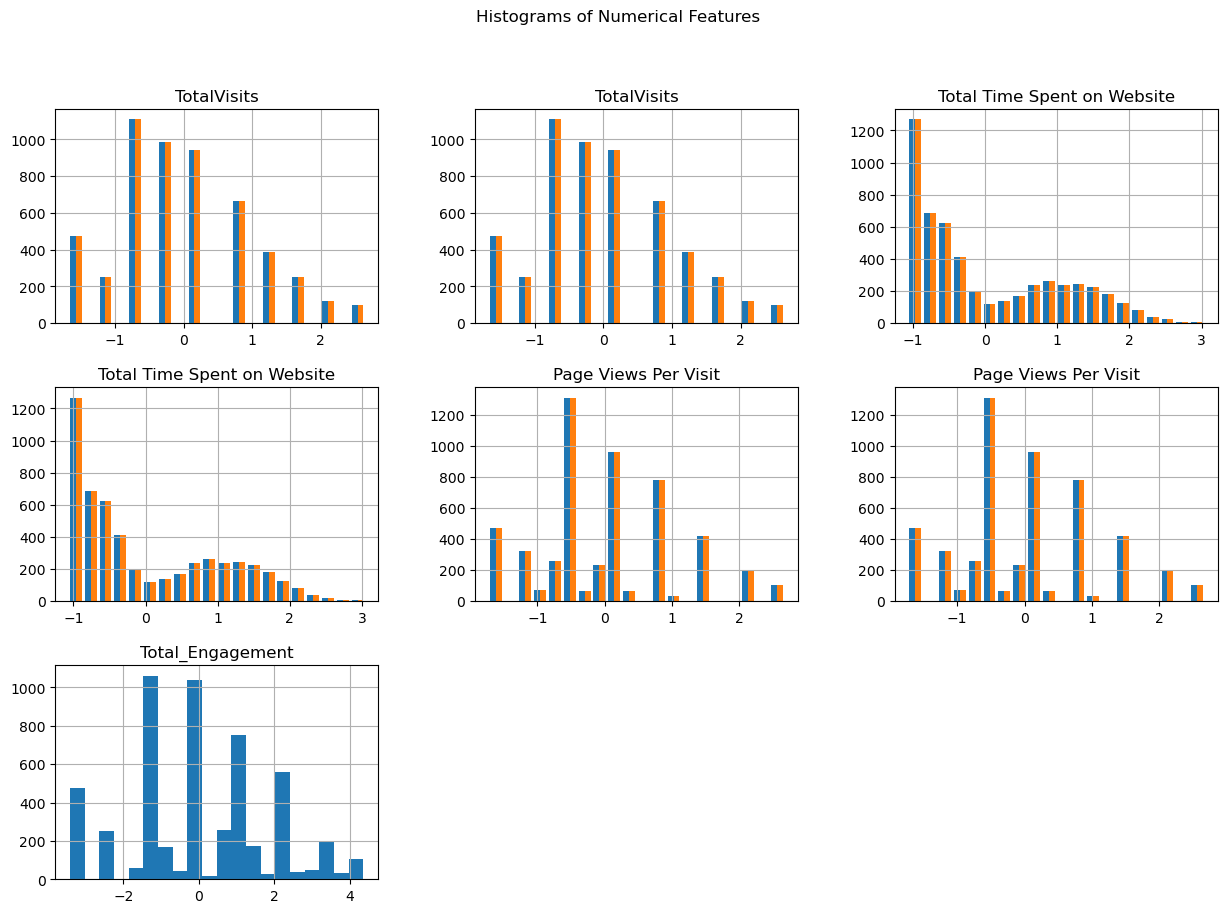

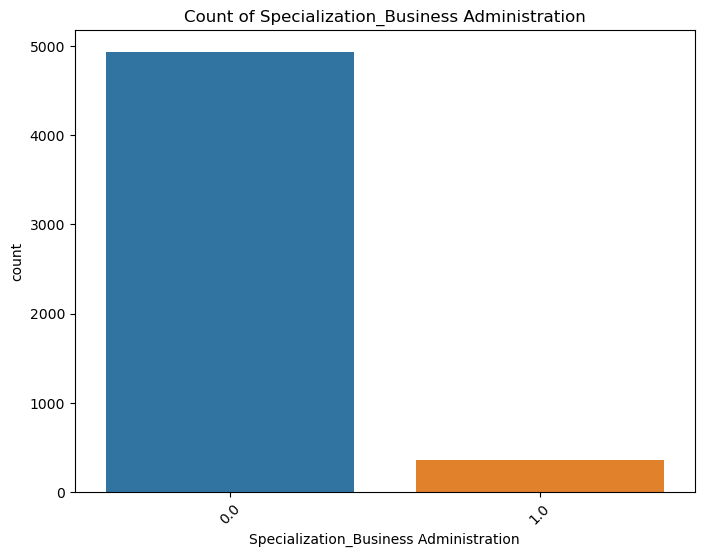

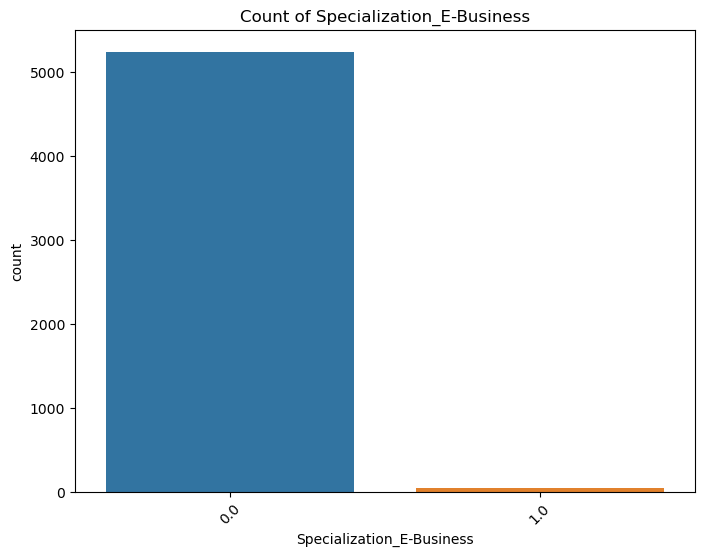

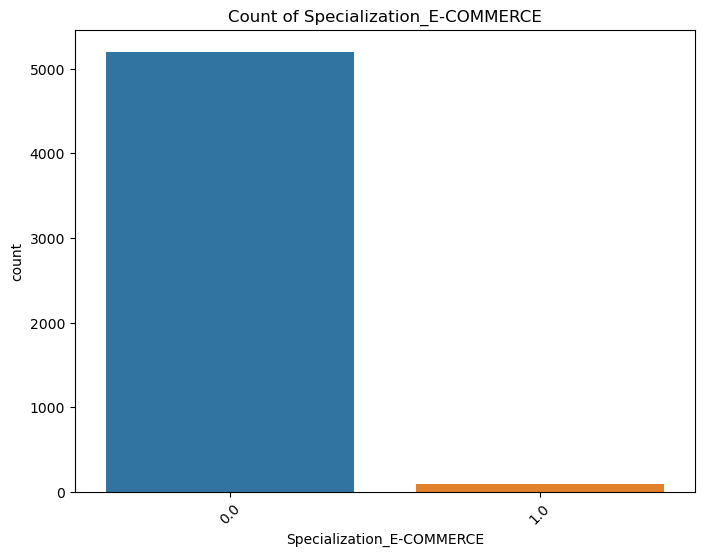

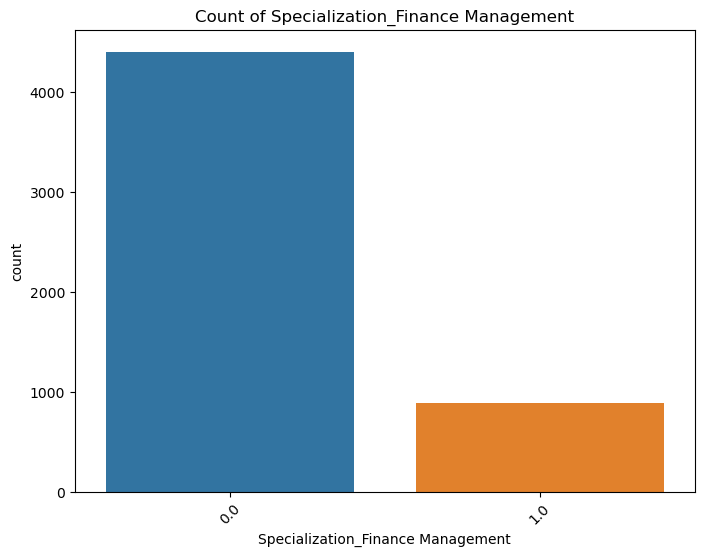

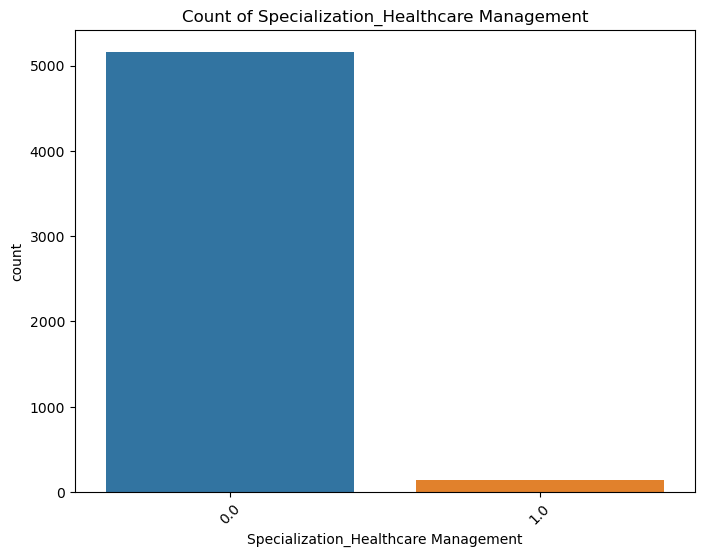

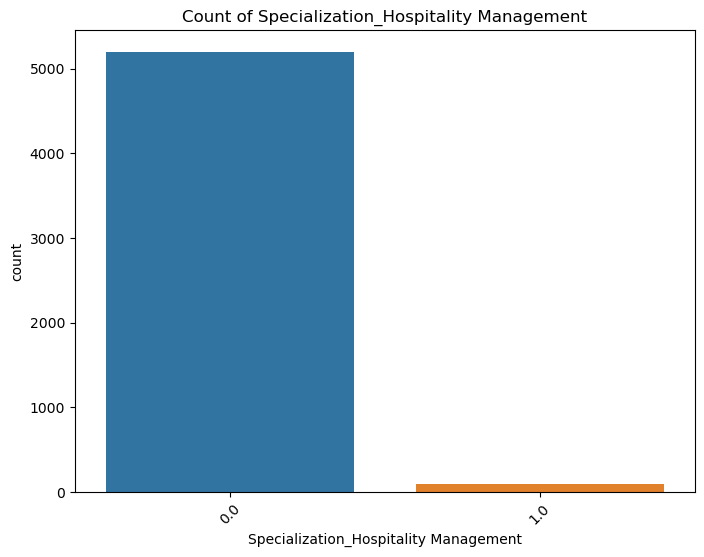

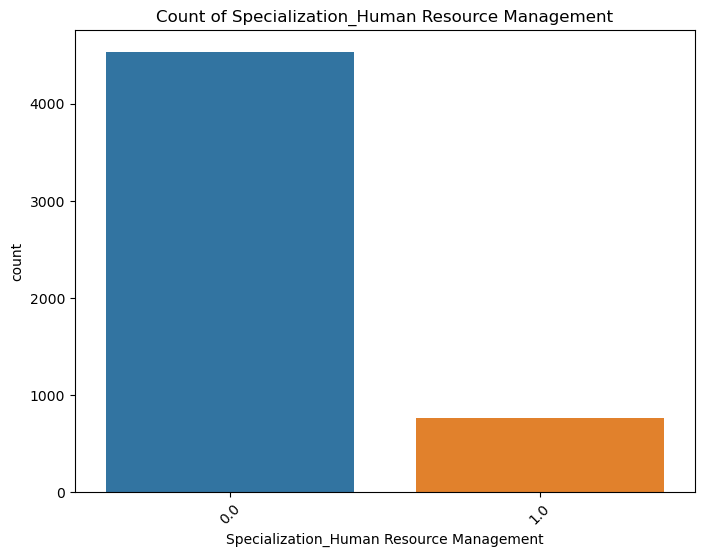

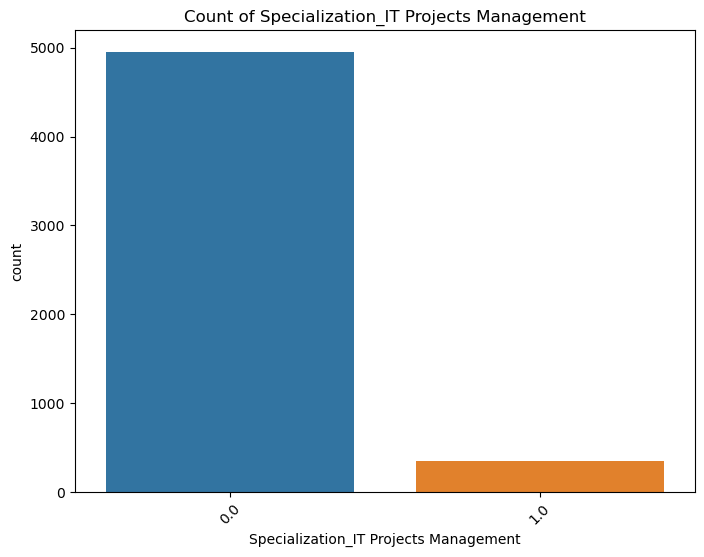

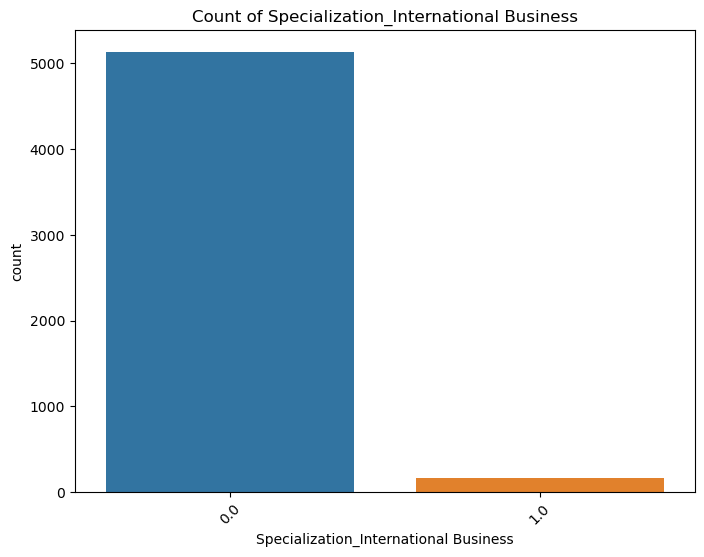

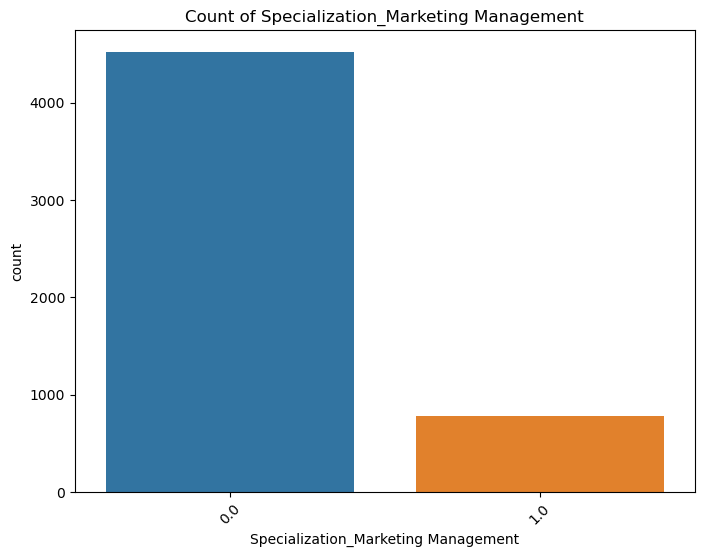

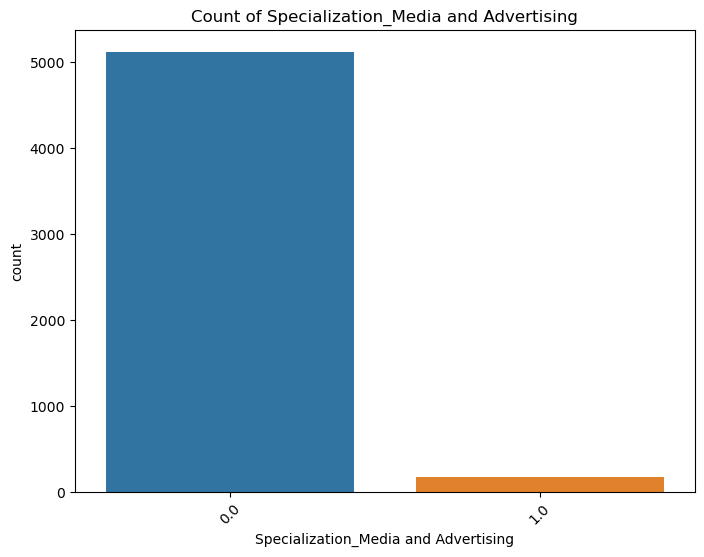

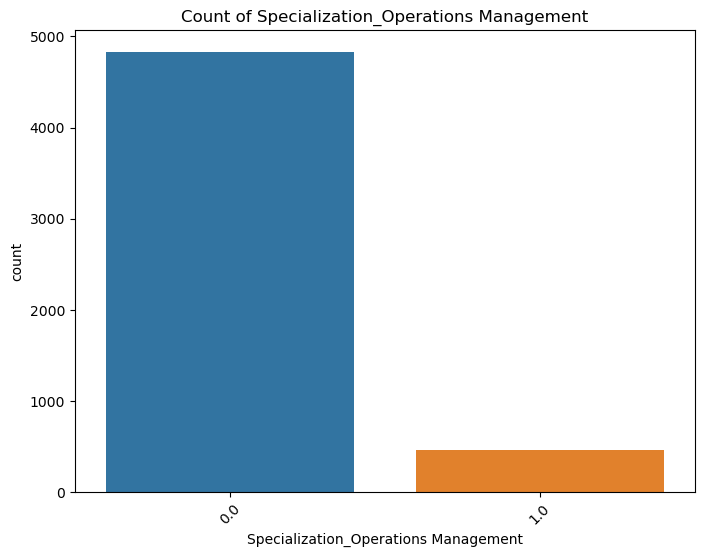

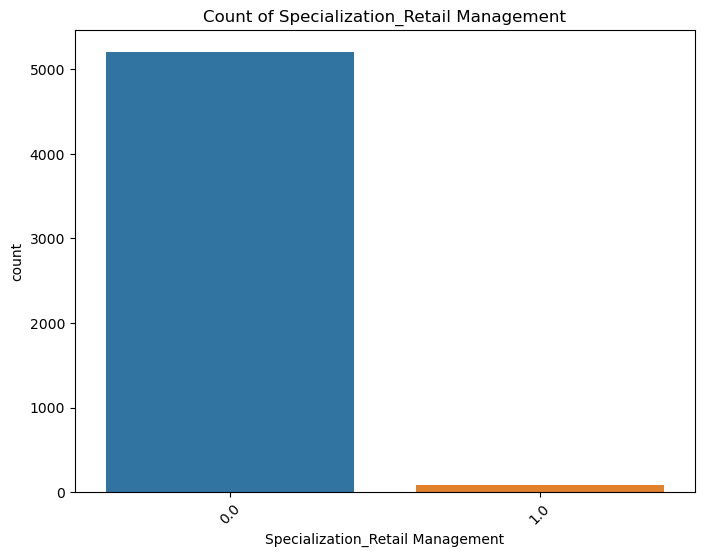

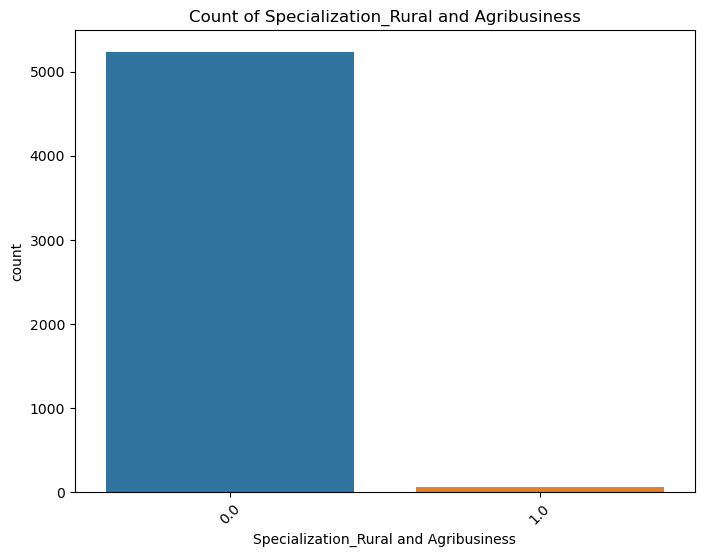

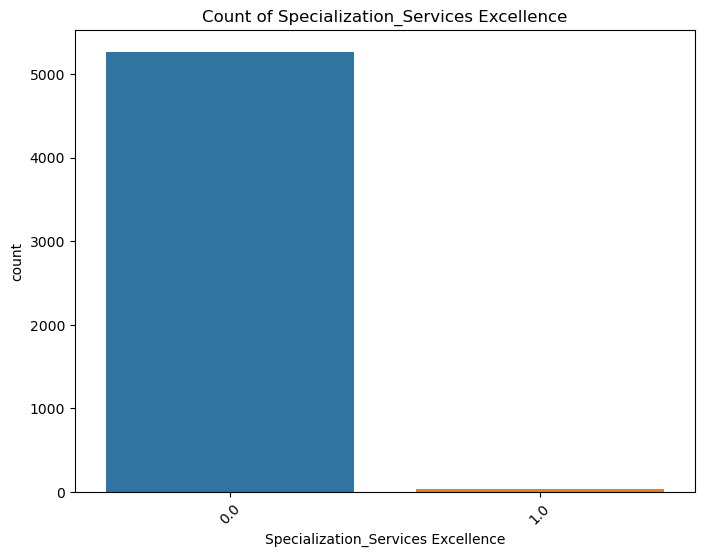

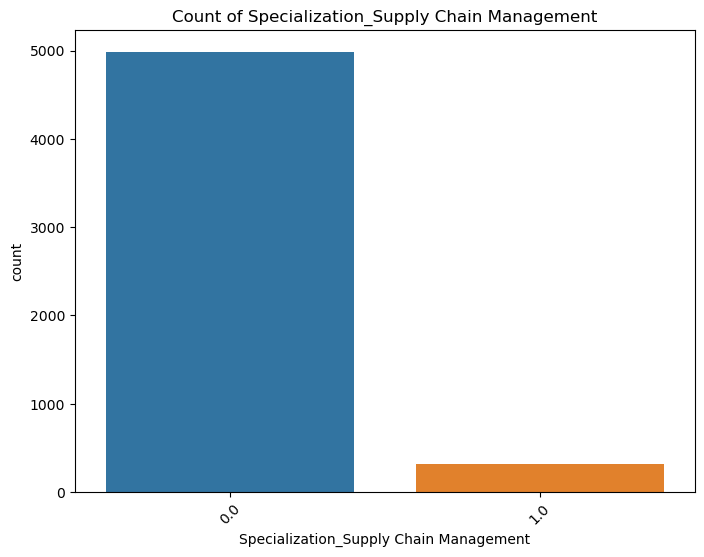

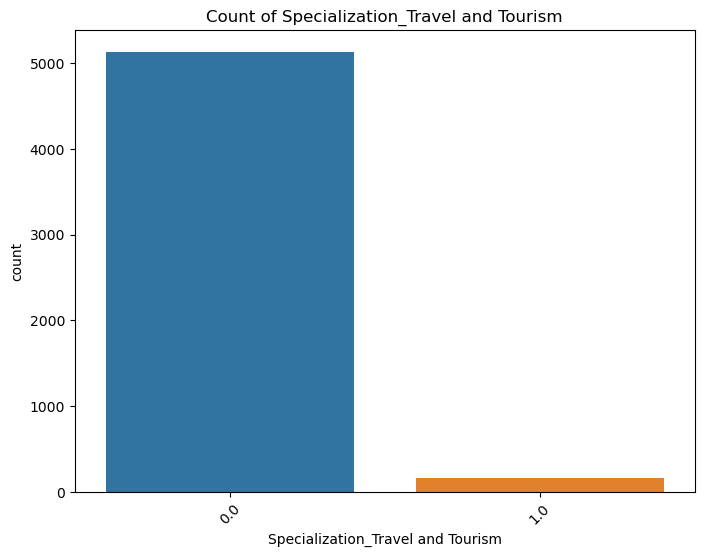

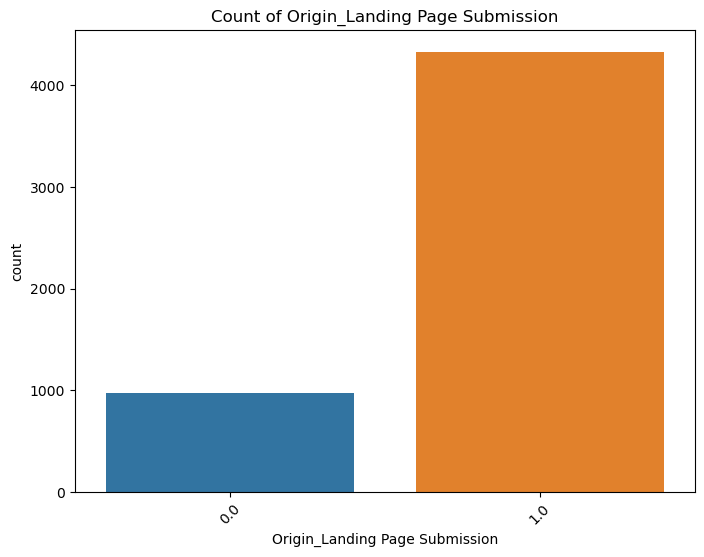

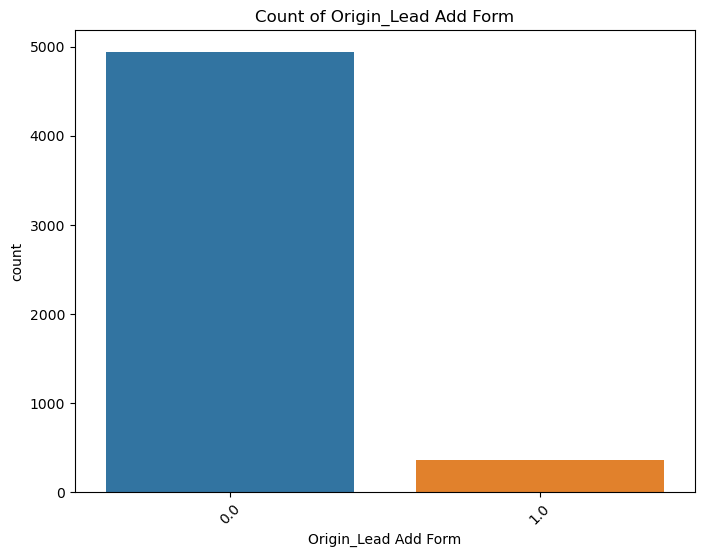

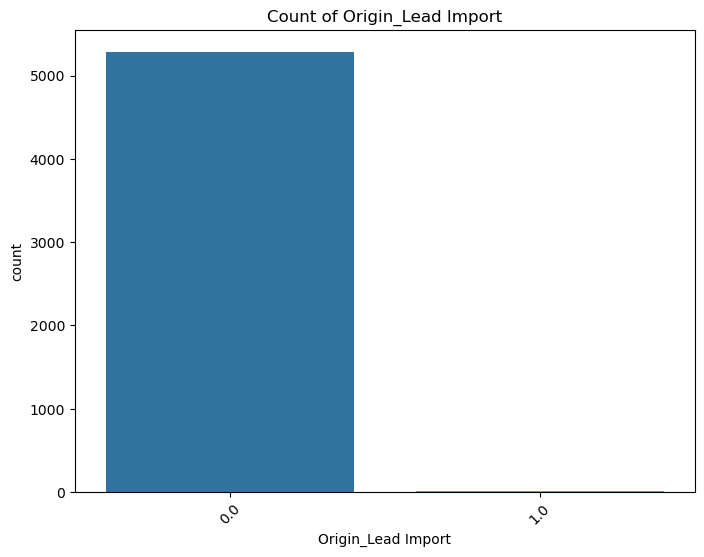

In [36]:
numerical_features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Total_Engagement']
data_transformed[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()
categorical_features = [col for col in data_transformed.columns if 'Specialization' in col or 'Origin' in col or 'Time_Spent_Binned' in col]
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data_transformed)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.show()

In [37]:
data_transformed.drop('ID', axis=1, inplace=True)

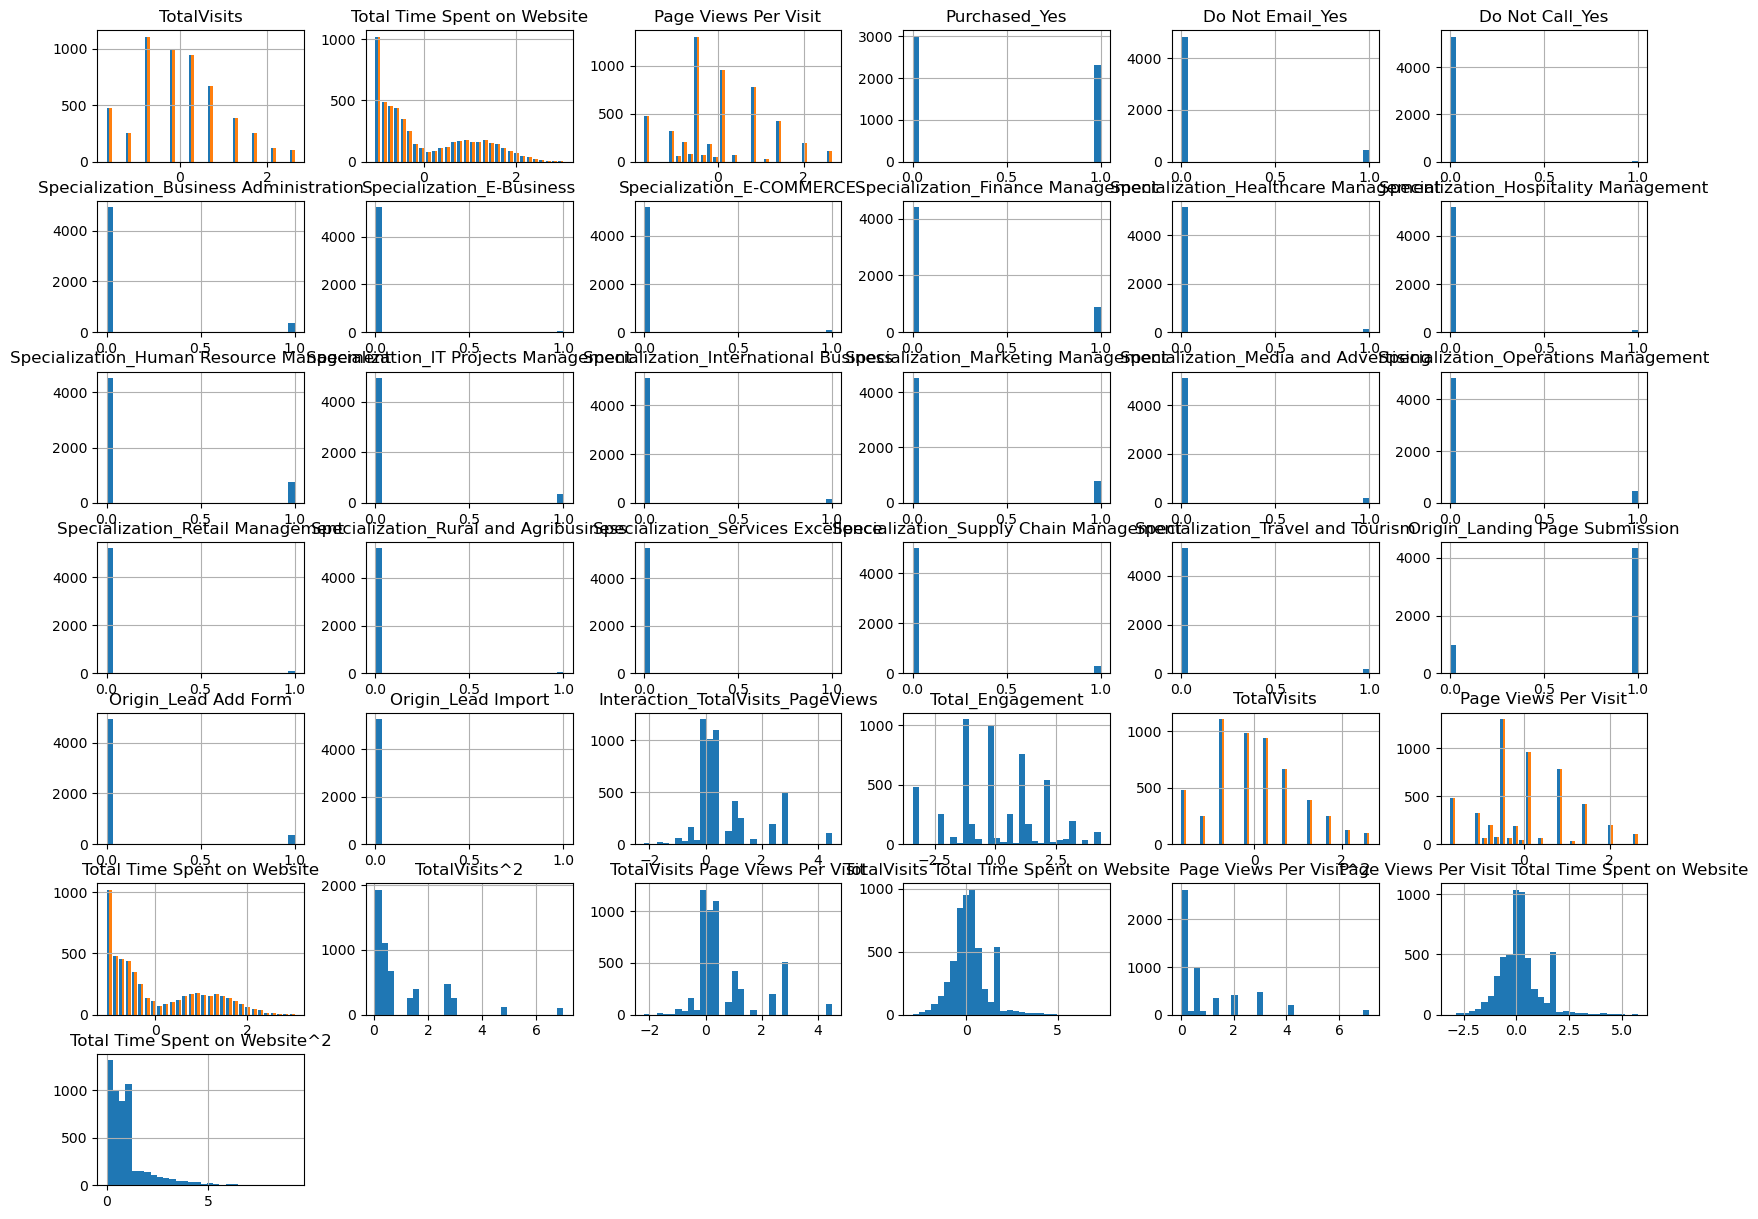

In [38]:
data_transformed.hist(bins=30, figsize=(20, 15))
plt.show()

In [39]:
data_transformed.dtypes

TotalVisits                                         float64
Total Time Spent on Website                         float64
Page Views Per Visit                                float64
Purchased_Yes                                       float64
Do Not Email_Yes                                    float64
Do Not Call_Yes                                     float64
Specialization_Business Administration              float64
Specialization_E-Business                           float64
Specialization_E-COMMERCE                           float64
Specialization_Finance Management                   float64
Specialization_Healthcare Management                float64
Specialization_Hospitality Management               float64
Specialization_Human Resource Management            float64
Specialization_IT Projects Management               float64
Specialization_International Business               float64
Specialization_Marketing Management                 float64
Specialization_Media and Advertising    

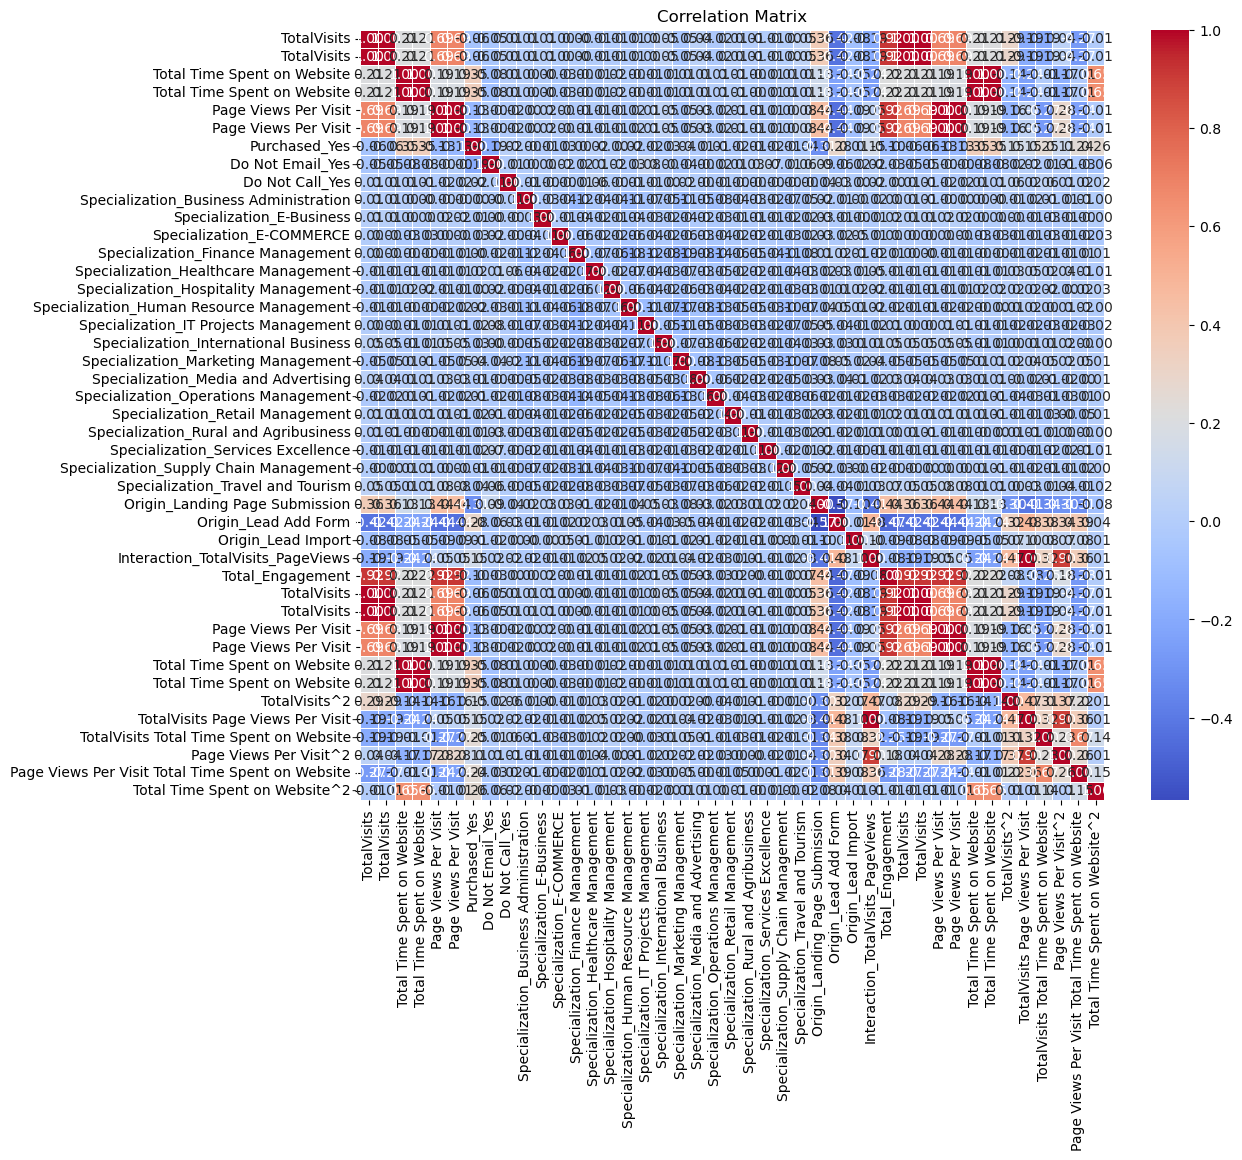

In [40]:
numerical_columns = data_transformed.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_transformed[numerical_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [42]:
from sklearn.model_selection import train_test_split
X = data_transformed.drop('Purchased_Yes', axis=1)  # Features
y = data_transformed['Purchased_Yes']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm_classifier = SVC()

logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)


SVC()

In [45]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

C:\Users\Saikiran\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Saikiran\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Saikiran\anaconda3\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Saikiran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _check_solver(self.solver, self.penalty

{'C': 0.1, 'penalty': 'l2'}

In [46]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Evaluate Logistic Regression
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression ROC-AUC Score:", roc_auc_lr)
print(classification_report(y_test, y_pred_lr))

# Evaluate Decision Tree
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree ROC-AUC Score:", roc_auc_dt)
print(classification_report(y_test, y_pred_dt))

# Evaluate Random Forest
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest ROC-AUC Score:", roc_auc_rf)
print(classification_report(y_test, y_pred_rf))

# Evaluate SVM
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("SVM ROC-AUC Score:", roc_auc_svm)
print(classification_report(y_test, y_pred_svm))


Logistic Regression Accuracy: 0.7554296506137866
Logistic Regression ROC-AUC Score: 0.7506456808305342
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78       598
         1.0       0.72      0.71      0.72       461

    accuracy                           0.76      1059
   macro avg       0.75      0.75      0.75      1059
weighted avg       0.76      0.76      0.76      1059

Decision Tree Accuracy: 0.7034938621340887
Decision Tree ROC-AUC Score: 0.7006834060026552
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73       598
         1.0       0.65      0.68      0.67       461

    accuracy                           0.70      1059
   macro avg       0.70      0.70      0.70      1059
weighted avg       0.71      0.70      0.70      1059

Random Forest Accuracy: 0.7695939565627951
Random Forest ROC-AUC Score: 0.7661692264163263
              precision    recall  f1-score   support

      